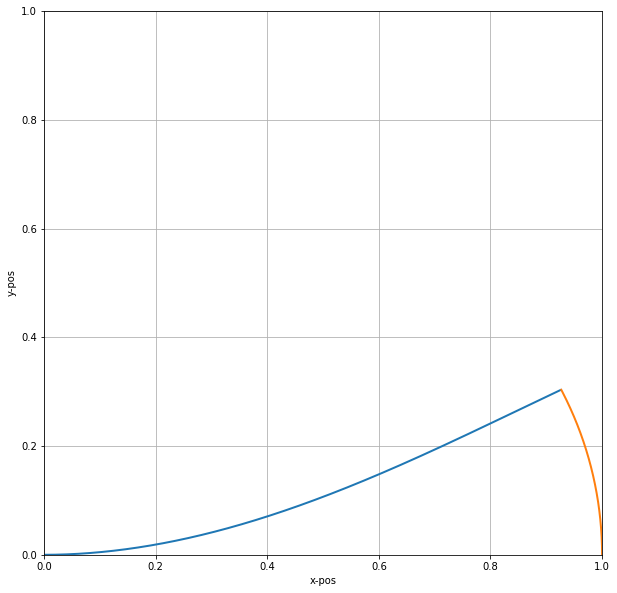

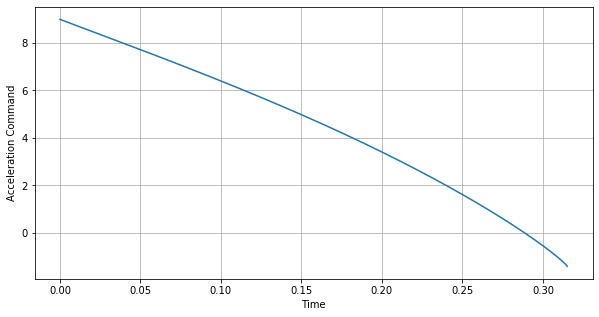

In [91]:
import numpy as np
import matplotlib.pyplot as plt

#Target Initial condition
vt0=1 #Target Velocity
gammat0=np.pi/2
xt=1
yt=0
nt=1.5
gammat=gammat0
vxt=vt0*np.cos(gammat)
vyt=vt0*np.sin(gammat)


#Missile Initial condition
v0=3 #Missile Velovity
gamma0=0
x=0
y=0
n=0
gamma=gamma0
vx=v0*np.cos(gamma)
vy=v0*np.sin(gamma)

t=0
h=0.00001

#For log
T=[]
Xt=[]
Yt=[]
X=[]
Y=[]
N=[]


#rtmx=xt-x
#rtmy=yt-y
#lambdaa=np.arctan2(rtmy, rtmx)


#Initial LOS angle and LOS rate
rtmx=xt-x
rtmy=yt-y
rtm=np.sqrt(rtmx**2+rtmy**2)
vtmx=vxt-vx
vtmy=vyt-vy

vc=-(rtmx*vtmx+rtmy*vtmy)/rtm
lambdaa=np.arctan2(rtmy, rtmx)
lambdadot=(rtmx*vtmy-rtmy*vtmx)/rtm**2

#Initial navigation(m)

#PPN
#n=1000*(lambdaa-gamma)

#PN
n=3*vc*lambdadot


for i in range(500000):
    T.append(t)
    Xt.append(xt)
    Yt.append(yt)
    X.append(x)
    Y.append(y)
    N.append(n)
    
    #break
    if np.sqrt((x-xt)**2+(y-yt)**2)<0.001:
        break
    
    #Target
    #pos
    xt=xt+vxt*h
    yt=yt+vyt*h

    #velocity
    vxt=vt0*np.cos(gammat)
    vyt=vt0*np.sin(gammat)
    
    #angle
    gammadott=nt/vt0
    gammat=gammat+gammadott*h

    #Missile    
    #pos(m)
    x=x+vx*h
    y=y+vy*h

    #velocity(m)
    vx=vx-n*np.sin(lambdaa)*h
    vy=vy+n*np.cos(lambdaa)*h
    
    #angle(m)
    gamma=np.arctan2(vy, vx)

    #LOS angle and LOS rate
    rtmx=xt-x
    rtmy=yt-y
    rtm=np.sqrt(rtmx**2+rtmy**2)
    vtmx=vxt-vx
    vtmy=vyt-vy
    
    vc=-(rtmx*vtmx+rtmy*vtmy)/rtm
    lambdaa=np.arctan2(rtmy, rtmx)
    lambdadot=(rtmx*vtmy-rtmy*vtmx)/rtm**2

    #navigation(m)
    
    #PPN
    #n=1000*(lambdaa-gamma)
    
    #PN
    n=3*vc*lambdadot
    
    #time
    t=t+h
    
plt.figure(figsize=(10,10))
plt.plot(X, Y,lw=2)    
plt.plot(Xt, Yt, lw=2)
plt.xlabel('x-pos')
plt.ylabel('y-pos')
plt.xlim(0,1)
plt.ylim(0,1)


plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(T, N)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Acceleration Command')
plt.show()